# Test PCA on soil Attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca import pca

In [2]:
site_slga_data = pd.read_csv('../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/site_slga_data.csv', index_col = 0)

In [3]:
site_slga_data = site_slga_data.drop(columns = ['PHW_005_015', 'PHW_015_030', 'PHW_030_060', 'PHW_060_100', 'PHW_100_200'])

In [4]:
site_slga_data = site_slga_data.dropna().copy()

In [5]:
site_slga_data.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABHC0015    16.750000    18.500000    22.500000        24.75        26.25   
NSABHC0018    14.666667    16.833334    19.166666        23.00        27.00   
NSABHC0019    16.250000    18.250000    20.000000        23.75        28.00   
NSABHC0020    15.000000    17.000000    22.500000        24.75        27.00   
NSABHC0021    17.750000    21.000000    26.500000        29.00        29.00   

            CLY_100_200  DER_000_999  NTO_000_005  NTO_005_015  NTO_015_030  \
NSABHC0015    37.500000    49.353374     0.045113     0.041196     0.033463   
NSABHC0018    28.333334    36.075130     0.058668     0.053181     0.039478   
NSABHC0019    28.250000    48.759270     0.050166     0.045422     0.034784   
NSABHC0020    30.750000    30.916204     0.052847     0.047825     0.033557   
NSABHC0021    38.000000    37.567870     0.046372     0.042036     0.032747   

            ...  SLT_000_005  SLT_005_015  SLT_030_060  SLT_060_100  \
NSABHC0015  ...        12.50    13.000000        14.75    15.750000   
NSABHC0018  ...        12.00    12.333333        14.00    15.666667   
NSABHC0019  ...        12.50    12.750000        14.00    15.750000   
NSABHC0020  ...        10.00    11.000000        13.00    14.000000   
NSABHC0021  ...        12.75    13.250000        15.00    15.500000   

            SLT_100_200  pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  \
NSABHC0015    11.000000     6.778077     6.810408     6.984777     7.166410   
NSABHC0018    10.833333     6.760462     6.850828     7.020003     7.166299   
NSABHC0019    11.000000     6.513579     6.596149     6.790872     7.059542   
NSABHC0020    10.000000     6.771367     6.856721     7.045397     7.198980   
NSABHC0021    11.000000     7.007833     7.095415     7.262317     7.415216   

            pHc_060_100  
NSABHC0015     7.353638  
NSABHC0018     7.340396  
NSABHC0019     7.267633  
NSABHC0020     7.352275  
NSABHC0021     7.571328  

[5 rows x 27 columns]

In [6]:
pca_1 = PCA(n_components = 10)

In [7]:
pca_1.fit(site_slga_data)

PCA(n_components=10)

In [8]:
print(pca_1.explained_variance_ratio_)

[6.47439890e-01 3.06369289e-01 1.85232285e-02 1.23230498e-02
 8.41421323e-03 2.60509796e-03 1.79552144e-03 1.01489204e-03
 5.63602530e-04 4.72397582e-04]


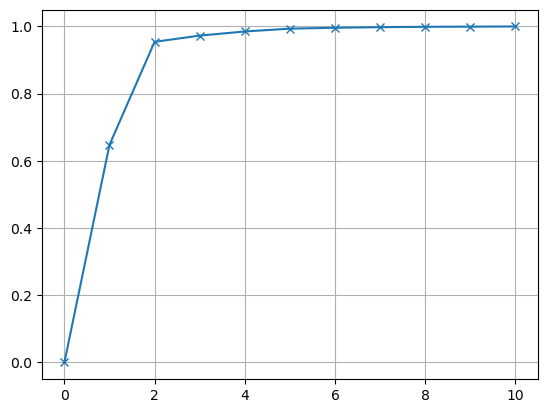

In [9]:
y = np.insert(np.cumsum(pca_1.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

In [10]:
#pca_1.get_covariance()

Check if using the standard scaler makes a difference:

In [11]:
site_slga_data_std = pd.DataFrame(StandardScaler().fit_transform(site_slga_data), columns = site_slga_data.columns)
pca_2 = PCA(n_components = 10)

In [12]:
pca_2.fit(site_slga_data_std)

PCA(n_components=10)

In [13]:
print(pca_2.explained_variance_ratio_)
print(np.cumsum(pca_2.explained_variance_ratio_))

[0.46393585 0.26687836 0.11595319 0.04961804 0.03844001 0.02694694
 0.01648808 0.00582539 0.00415378 0.00283782]
[0.46393585 0.73081422 0.84676741 0.89638545 0.93482546 0.9617724
 0.97826049 0.98408588 0.98823965 0.99107747]


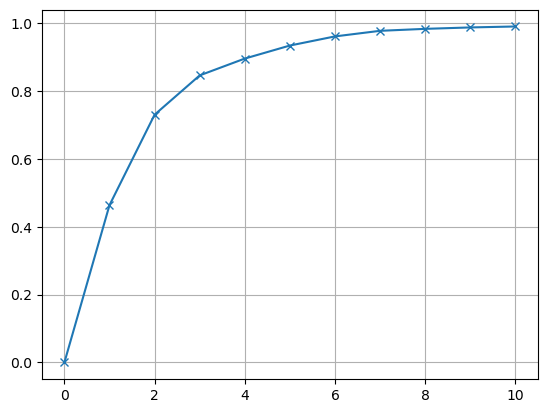

In [14]:
y = np.insert(np.cumsum(pca_2.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

Without REG

In [15]:
site_slga_data_reduced =  site_slga_data.drop(columns = ['DER_000_999']).copy()

In [16]:
site_slga_data_reduced.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABHC0015    16.750000    18.500000    22.500000        24.75        26.25   
NSABHC0018    14.666667    16.833334    19.166666        23.00        27.00   
NSABHC0019    16.250000    18.250000    20.000000        23.75        28.00   
NSABHC0020    15.000000    17.000000    22.500000        24.75        27.00   
NSABHC0021    17.750000    21.000000    26.500000        29.00        29.00   

            CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  \
NSABHC0015    37.500000     0.045113     0.041196     0.033463     0.025520   
NSABHC0018    28.333334     0.058668     0.053181     0.039478     0.029264   
NSABHC0019    28.250000     0.050166     0.045422     0.034784     0.026155   
NSABHC0020    30.750000     0.052847     0.047825     0.033557     0.024959   
NSABHC0021    38.000000     0.046372     0.042036     0.032747     0.024532   

            ...  SLT_000_005  SLT_005_015  SLT_030_060  SLT_060_100  \
NSABHC0015  ...        12.50    13.000000        14.75    15.750000   
NSABHC0018  ...        12.00    12.333333        14.00    15.666667   
NSABHC0019  ...        12.50    12.750000        14.00    15.750000   
NSABHC0020  ...        10.00    11.000000        13.00    14.000000   
NSABHC0021  ...        12.75    13.250000        15.00    15.500000   

            SLT_100_200  pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  \
NSABHC0015    11.000000     6.778077     6.810408     6.984777     7.166410   
NSABHC0018    10.833333     6.760462     6.850828     7.020003     7.166299   
NSABHC0019    11.000000     6.513579     6.596149     6.790872     7.059542   
NSABHC0020    10.000000     6.771367     6.856721     7.045397     7.198980   
NSABHC0021    11.000000     7.007833     7.095415     7.262317     7.415216   

            pHc_060_100  
NSABHC0015     7.353638  
NSABHC0018     7.340396  
NSABHC0019     7.267633  
NSABHC0020     7.352275  
NSABHC0021     7.571328  

[5 rows x 26 columns]

In [17]:
site_slga_data_red_std = pd.DataFrame(StandardScaler().fit_transform(site_slga_data_reduced), columns = site_slga_data_reduced.columns)

In [18]:
site_slga_data_red_std.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
0     0.298739     0.341568     0.436680     0.309716     0.275030   
1     0.044705     0.149671     0.084803     0.137255     0.349619   
2     0.237771     0.312784     0.172773     0.211167     0.449071   
3     0.085350     0.168861     0.436680     0.309716     0.349619   
4     0.420676     0.629414     0.858932     0.728550     0.548522   

   CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  ...  \
0     1.226293    -0.501045    -0.506654    -0.462353    -0.464008  ...   
1     0.301974    -0.353589    -0.342187    -0.315900    -0.310011  ...   
2     0.293571    -0.446074    -0.448666    -0.430181    -0.437884  ...   
3     0.545658    -0.416914    -0.415686    -0.460046    -0.487103  ...   
4     1.276711    -0.487353    -0.495121    -0.479770    -0.504650  ...   

   SLT_000_005  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
0     0.937447     1.019251     1.273102     1.413279     0.728989   
1     0.809003     0.848685     1.076100     1.391360     0.663096   
2     0.937447     0.955289     1.076100     1.413279     0.728989   
3     0.295224     0.507553     0.813431     0.952976     0.333629   
4     1.001670     1.083213     1.338770     1.347522     0.728989   

   pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  
0     1.200544     1.158543     1.154450     1.093557     1.076048  
1     1.179335     1.205477     1.193346     1.093442     1.062554  
2     0.882069     0.909758     0.940336     0.982326     0.988407  
3     1.192465     1.212319     1.221387     1.127457     1.074659  
4     1.477189     1.489478     1.460913     1.352522     1.297880  

[5 rows x 26 columns]

In [19]:
pca_red = PCA(n_components = 10)
pca_red.fit(site_slga_data_red_std)

PCA(n_components=10)

In [20]:
print(pca_red.explained_variance_ratio_)
print(np.cumsum(pca_red.explained_variance_ratio_))

[0.48044075 0.27272061 0.11612509 0.05135876 0.03934326 0.01717922
 0.00609778 0.00431494 0.00297167 0.00277325]
[0.48044075 0.75316135 0.86928644 0.92064521 0.95998847 0.97716769
 0.98326547 0.98758041 0.99055209 0.99332534]


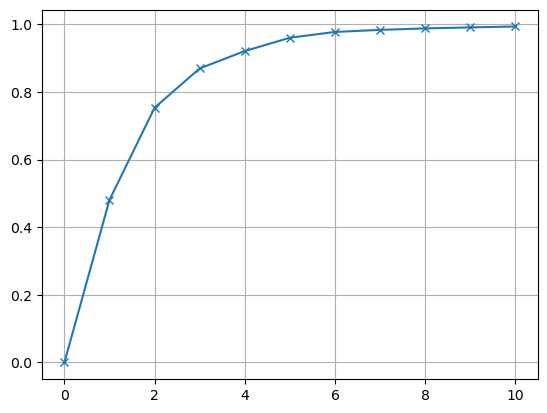

In [21]:
y = np.insert(np.cumsum(pca_red.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

In [22]:
pca_red = PCA(n_components = 3)
projected_SLGA = pca_red.fit_transform(site_slga_data_red_std)
SLGA_PCA_Processed = pd.DataFrame(projected_SLGA, columns = ['SLGA_1', 'SLGA_2', 'SLGA_3'])

In [23]:
SLGA_PCA_Processed.head()

SLGA_1    SLGA_2    SLGA_3
0  1.347107 -3.497527  0.562057
1  1.324231 -2.861619  1.382740
2  0.798366 -2.959512  0.124995
3  0.101296 -3.084137  0.507623
4  1.660016 -4.200554  0.750374

<Axes: xlabel='SLGA_1', ylabel='SLGA_2'>

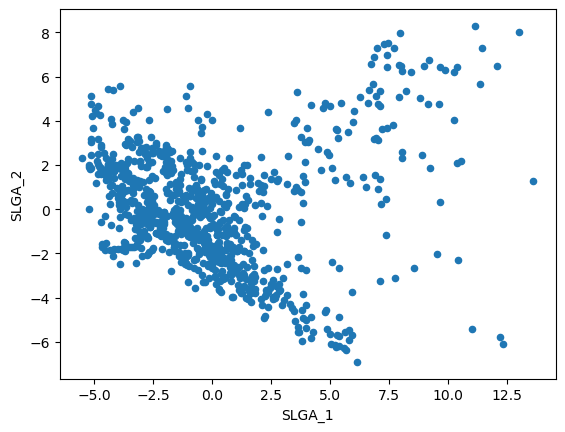

In [24]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_1', y = 'SLGA_2')

<Axes: xlabel='SLGA_2', ylabel='SLGA_3'>

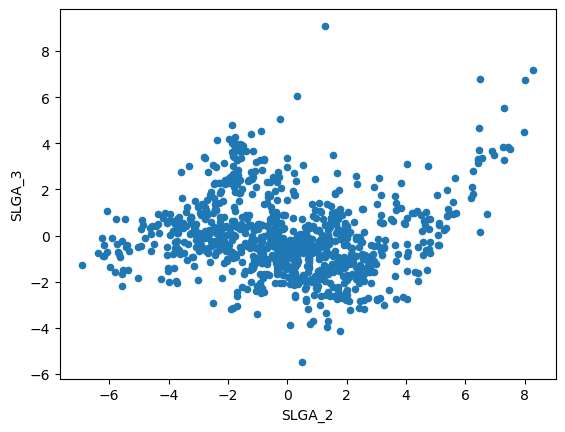

In [25]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_2', y = 'SLGA_3')

<Axes: xlabel='SLGA_1', ylabel='SLGA_3'>

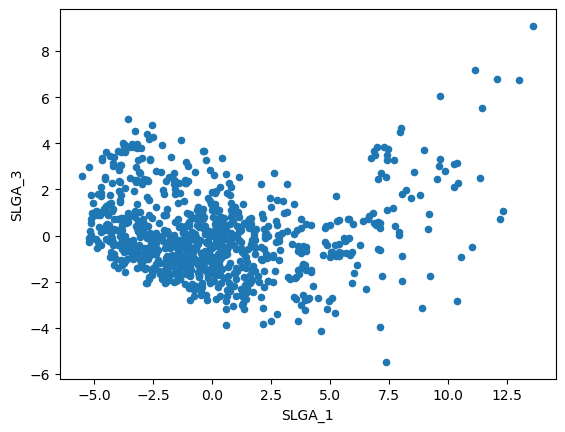

In [26]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_1', y = 'SLGA_3')

In [27]:
SLGA_PCA_Processed_reversed = pd.DataFrame(pca_red.inverse_transform(SLGA_PCA_Processed), columns = site_slga_data_red_std.columns)
SLGA_PCA_Processed_reversed.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
0     0.892399     0.888837     0.868601     0.727268     0.594591   
1     0.692530     0.686596     0.656675     0.508709     0.385835   
2     0.715232     0.712660     0.699085     0.589252     0.482103   
3     0.556887     0.550722     0.526224     0.390489     0.271948   
4     1.073764     1.069305     1.044054     0.871908     0.711422   

   CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  ...  \
0     0.706530    -0.485719    -0.466893    -0.416398    -0.377946  ...   
1     0.477245    -0.263467    -0.243015    -0.181195    -0.138611  ...   
2     0.580507    -0.510958    -0.497746    -0.464649    -0.436163  ...   
3     0.385979    -0.634461    -0.621183    -0.584190    -0.549396  ...   
4     0.845510    -0.567838    -0.544741    -0.482249    -0.435177  ...   

   SLT_000_005  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
0     0.754128     0.763845     0.810743     0.816137     0.522741   
1     0.545755     0.551447     0.569893     0.585753     0.299130   
2     0.607690     0.616443     0.668074     0.670559     0.435083   
3     0.420449     0.427604     0.487246     0.501765     0.221659   
4     0.905263     0.916779     0.971068     0.978269     0.622555   

   pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  
0     1.151083     1.152744     1.156232     1.148461     1.136125  
1     1.181938     1.179843     1.177367     1.165740     1.148614  
2     0.898812     0.901973     0.907357     0.903842     0.897587  
3     1.086054     1.089351     1.094080     1.091645     1.087080  
4     1.400567     1.402239     1.405955     1.396093     1.380562  

[5 rows x 26 columns]

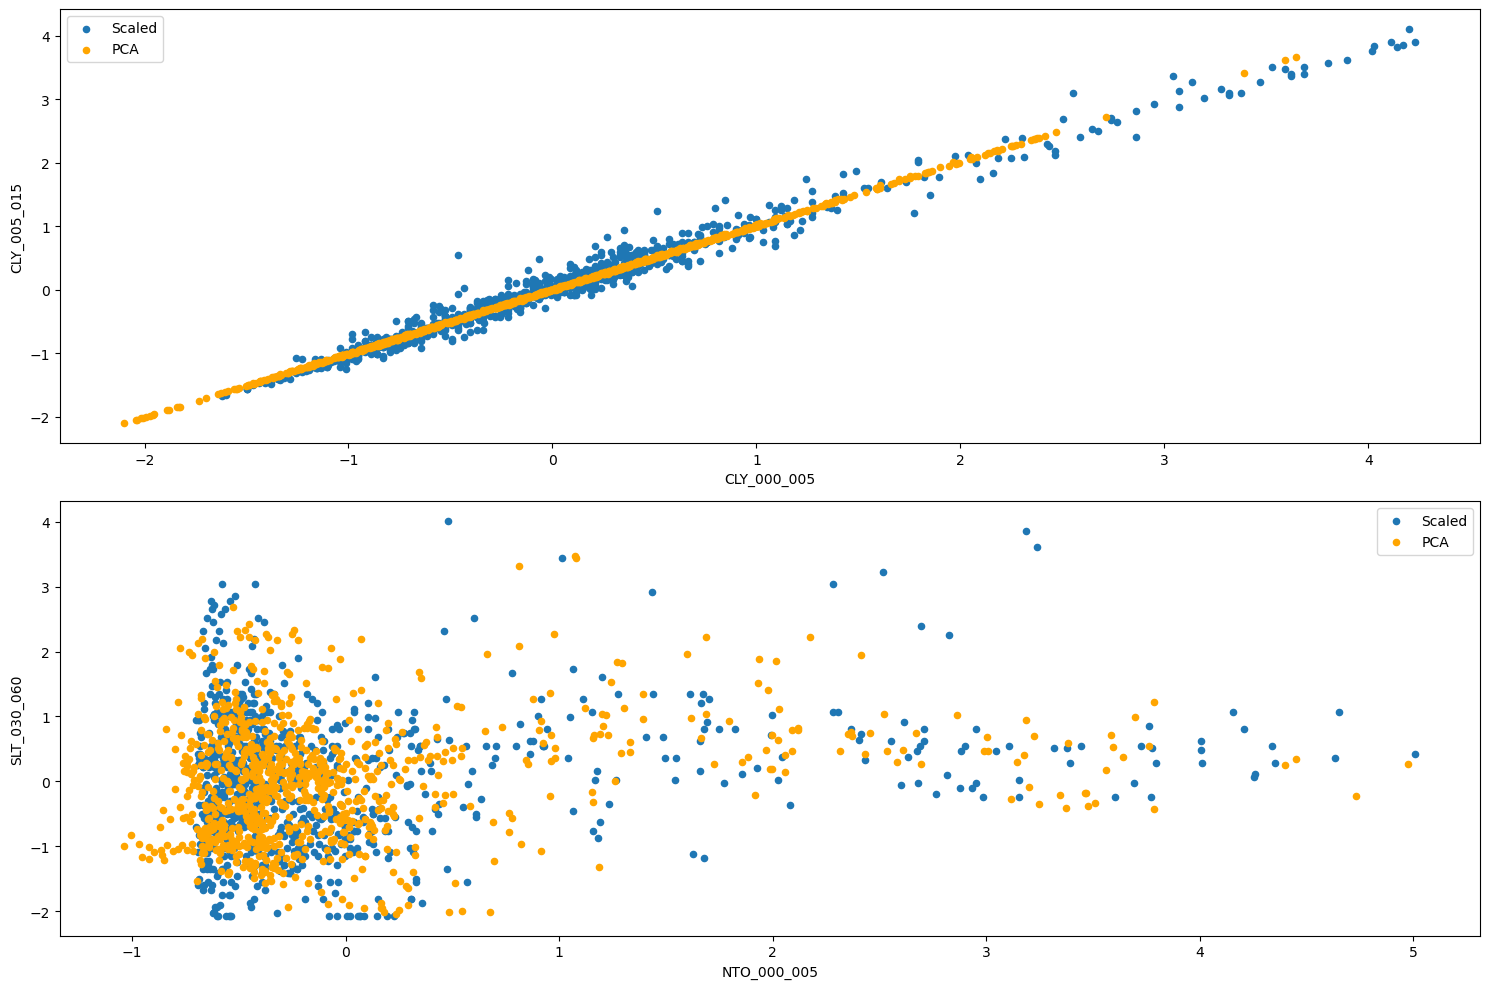

In [28]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))

site_slga_data_red_std.plot.scatter(x ='CLY_000_005', y = 'CLY_005_015', ax = ax[0], label = 'Scaled')
SLGA_PCA_Processed_reversed.plot.scatter(x ='CLY_000_005',y = 'CLY_005_015', ax = ax[0], color = 'orange', label = 'PCA')

site_slga_data_red_std.plot.scatter(x ='NTO_000_005', y = 'SLT_030_060', ax = ax[1], label = 'Scaled')
SLGA_PCA_Processed_reversed.plot.scatter(x ='NTO_000_005',y = 'SLT_030_060', ax = ax[1], color = 'orange', label = 'PCA')
fig.tight_layout()


In [29]:
component_importances = pd.DataFrame(np.abs(pca_red.components_), columns = site_slga_data_red_std.columns, index = [1,2,3])

In [30]:
component_importances.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
1     0.210694     0.213433     0.219382     0.229190     0.230438   
2     0.188697     0.187256     0.181736     0.143558     0.107684   
3     0.091455     0.095385     0.111298     0.148690     0.164506   

   CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  ...  \
1     0.216371     0.190818     0.193929     0.201089     0.200408  ...   
2     0.144594     0.228316     0.224890     0.216504     0.207211  ...   
3     0.161312     0.099222     0.103944     0.124440     0.136657  ...   

   SLT_000_005  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
1     0.223611     0.224881     0.207857     0.199034     0.218110   
2     0.150546     0.153278     0.176055     0.178661     0.096274   
3     0.131018     0.133770     0.151264     0.136738     0.191792   

   pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  
1     0.062324     0.064048     0.065628     0.069746     0.075624  
2     0.308892     0.310566     0.313039     0.313161     0.312896  
3     0.275206     0.271877     0.266482     0.261764     0.255557  

[3 rows x 26 columns]

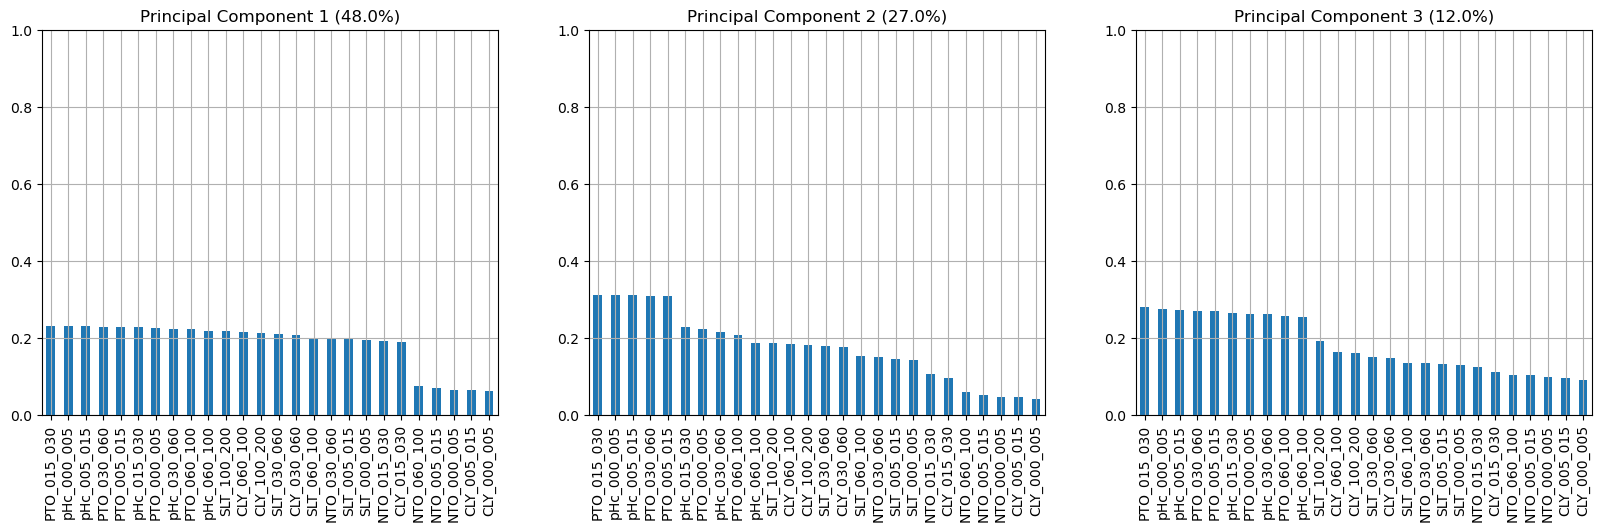

In [31]:
fig, ax = plt.subplots(1,3, figsize = (20,5), sharex = True)
for i in range(1, len(component_importances) + 1):
    principal_importances = component_importances.iloc[i - 1,].sort_values(ascending = False)
    principal_importances.plot.bar(ax = ax[i - 1], ylim = (0, 1), title = f'Principal Component {i} ({round(pca_red.explained_variance_ratio_[i-1],2)*100}%)')
    ax[i-1].grid(True)

In [32]:
len(component_importances)

3

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [26] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [26] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [97.71%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

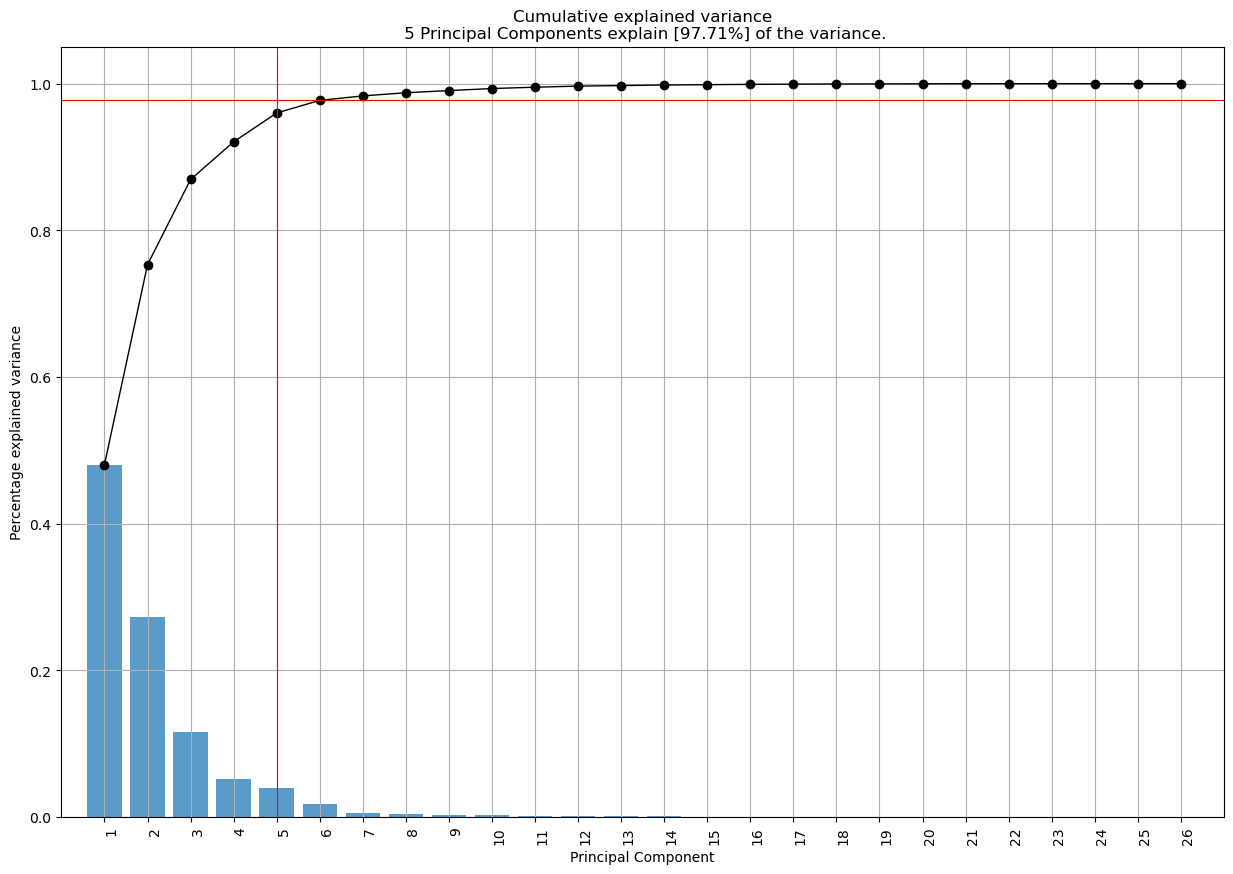

In [33]:
model = pca()
results = model.fit_transform(site_slga_data_red_std)
model.plot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.71%] of the variance'}, xlabel='PC1 (48.0% expl.var)', ylabel='PC2 (27.2% expl.var)'>)

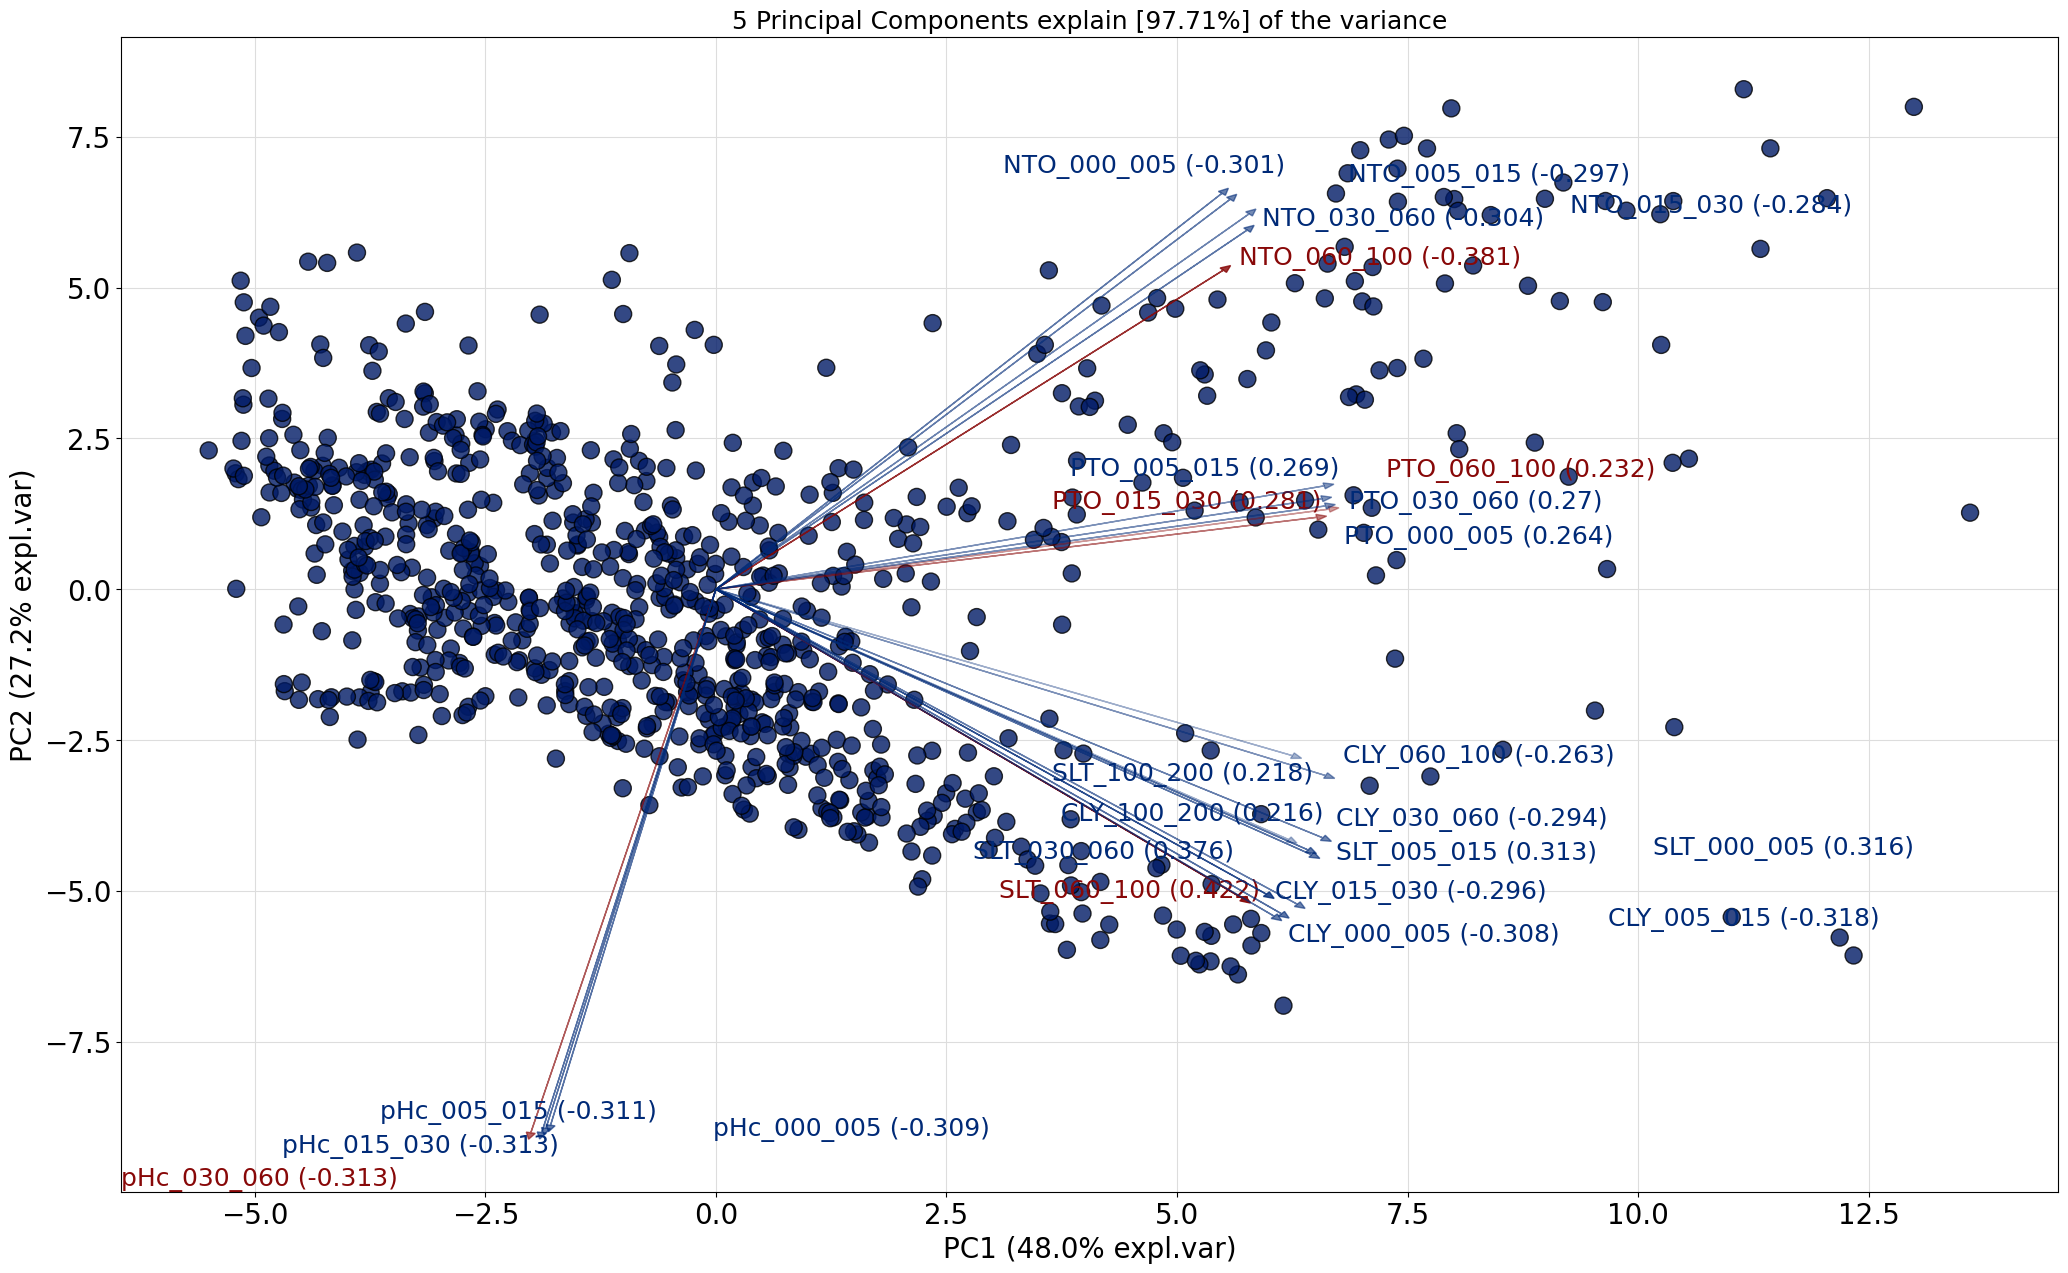

In [34]:
model.biplot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.71%] of the variance'}, xlabel='PC2 (27.2% expl.var)', ylabel='PC3 (11.6% expl.var)'>)

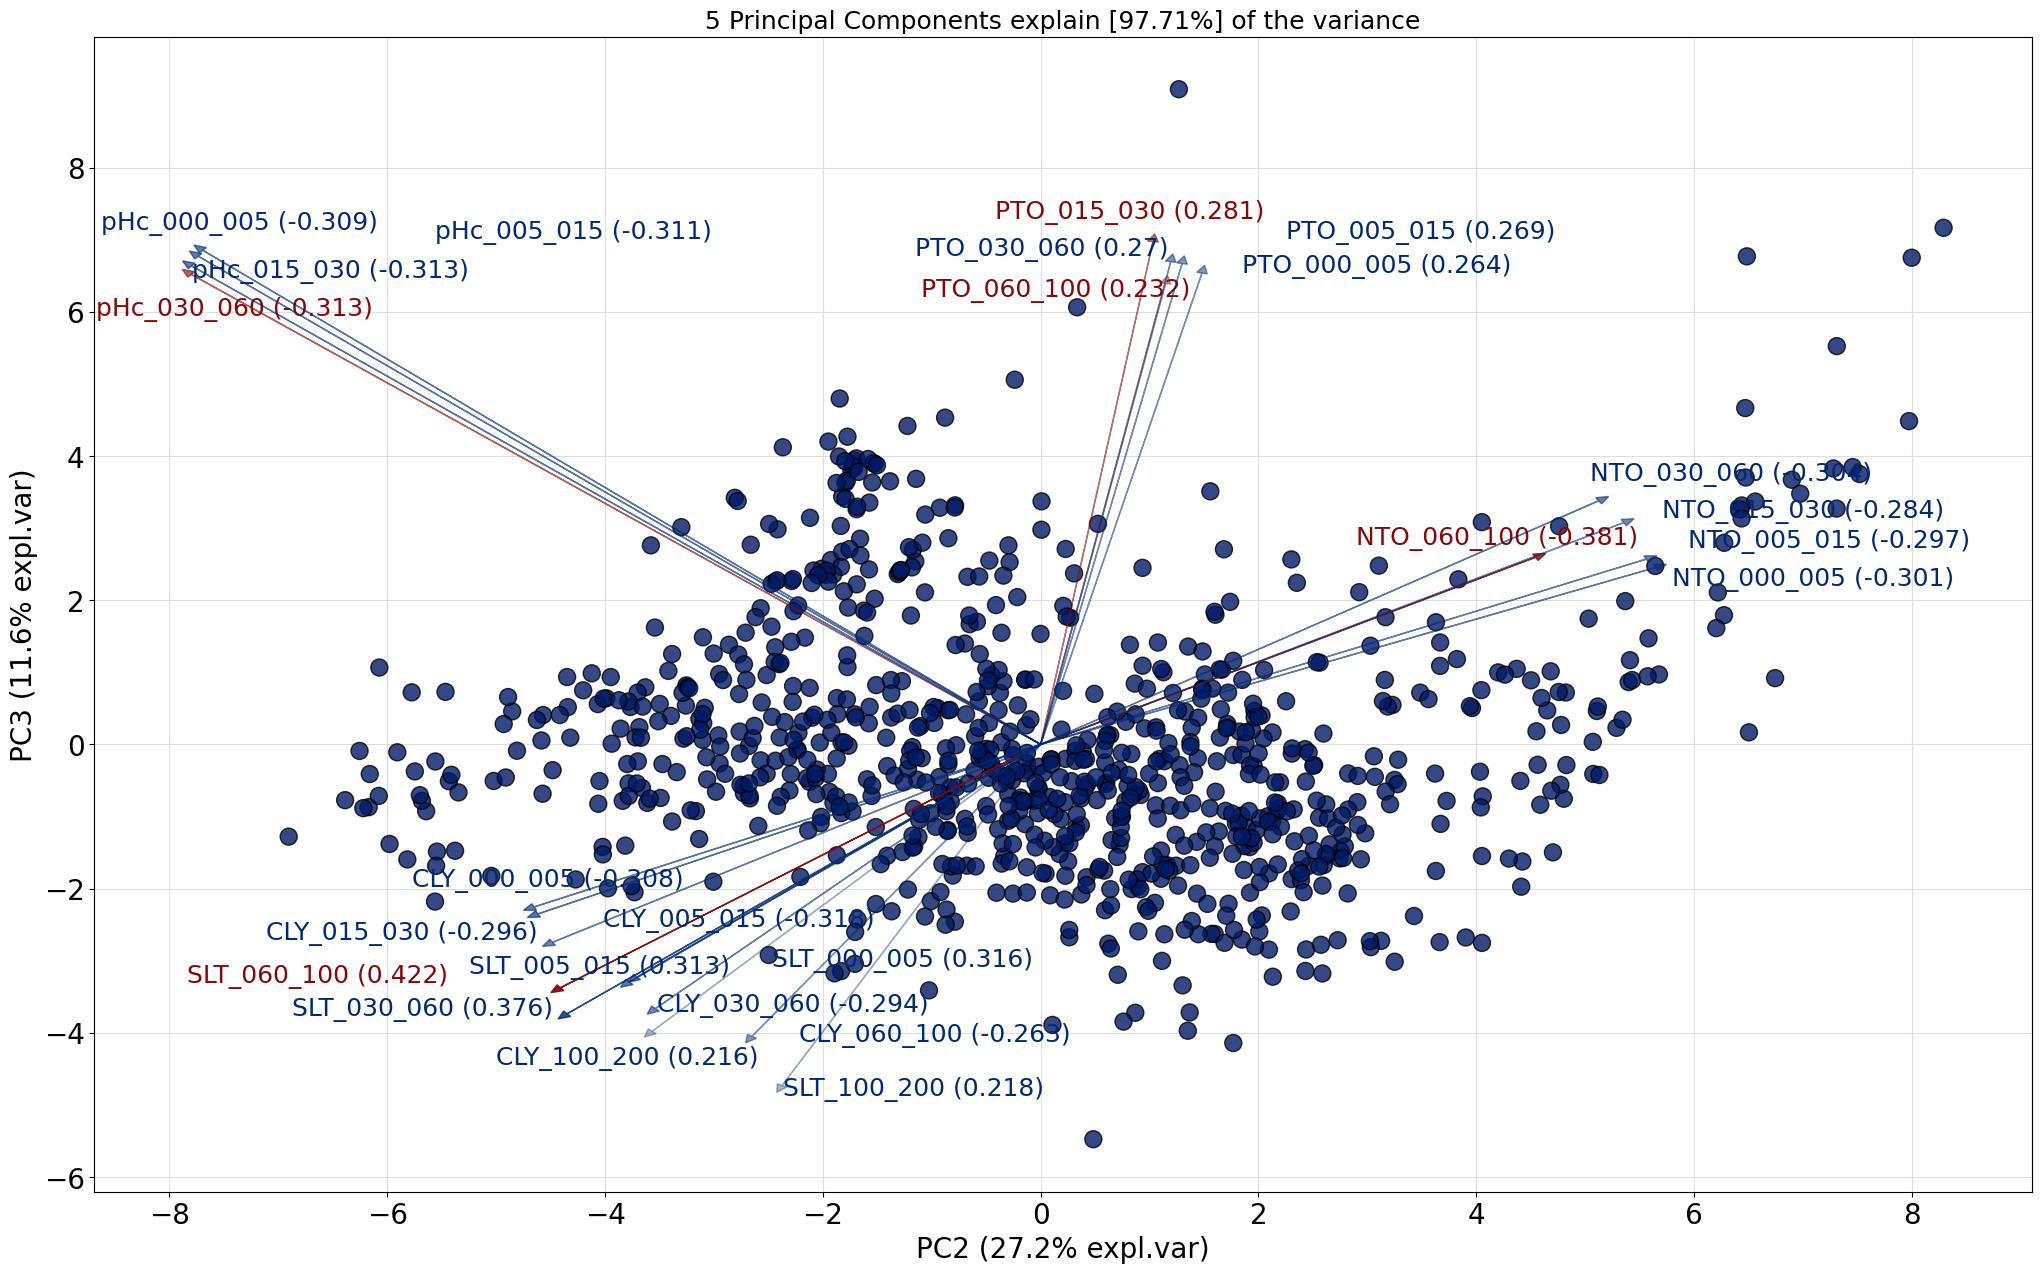

In [35]:
model.biplot(PC = [1,2])

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.71%] of the variance'}, xlabel='PC1 (48.0% expl.var)', ylabel='PC3 (11.6% expl.var)'>)

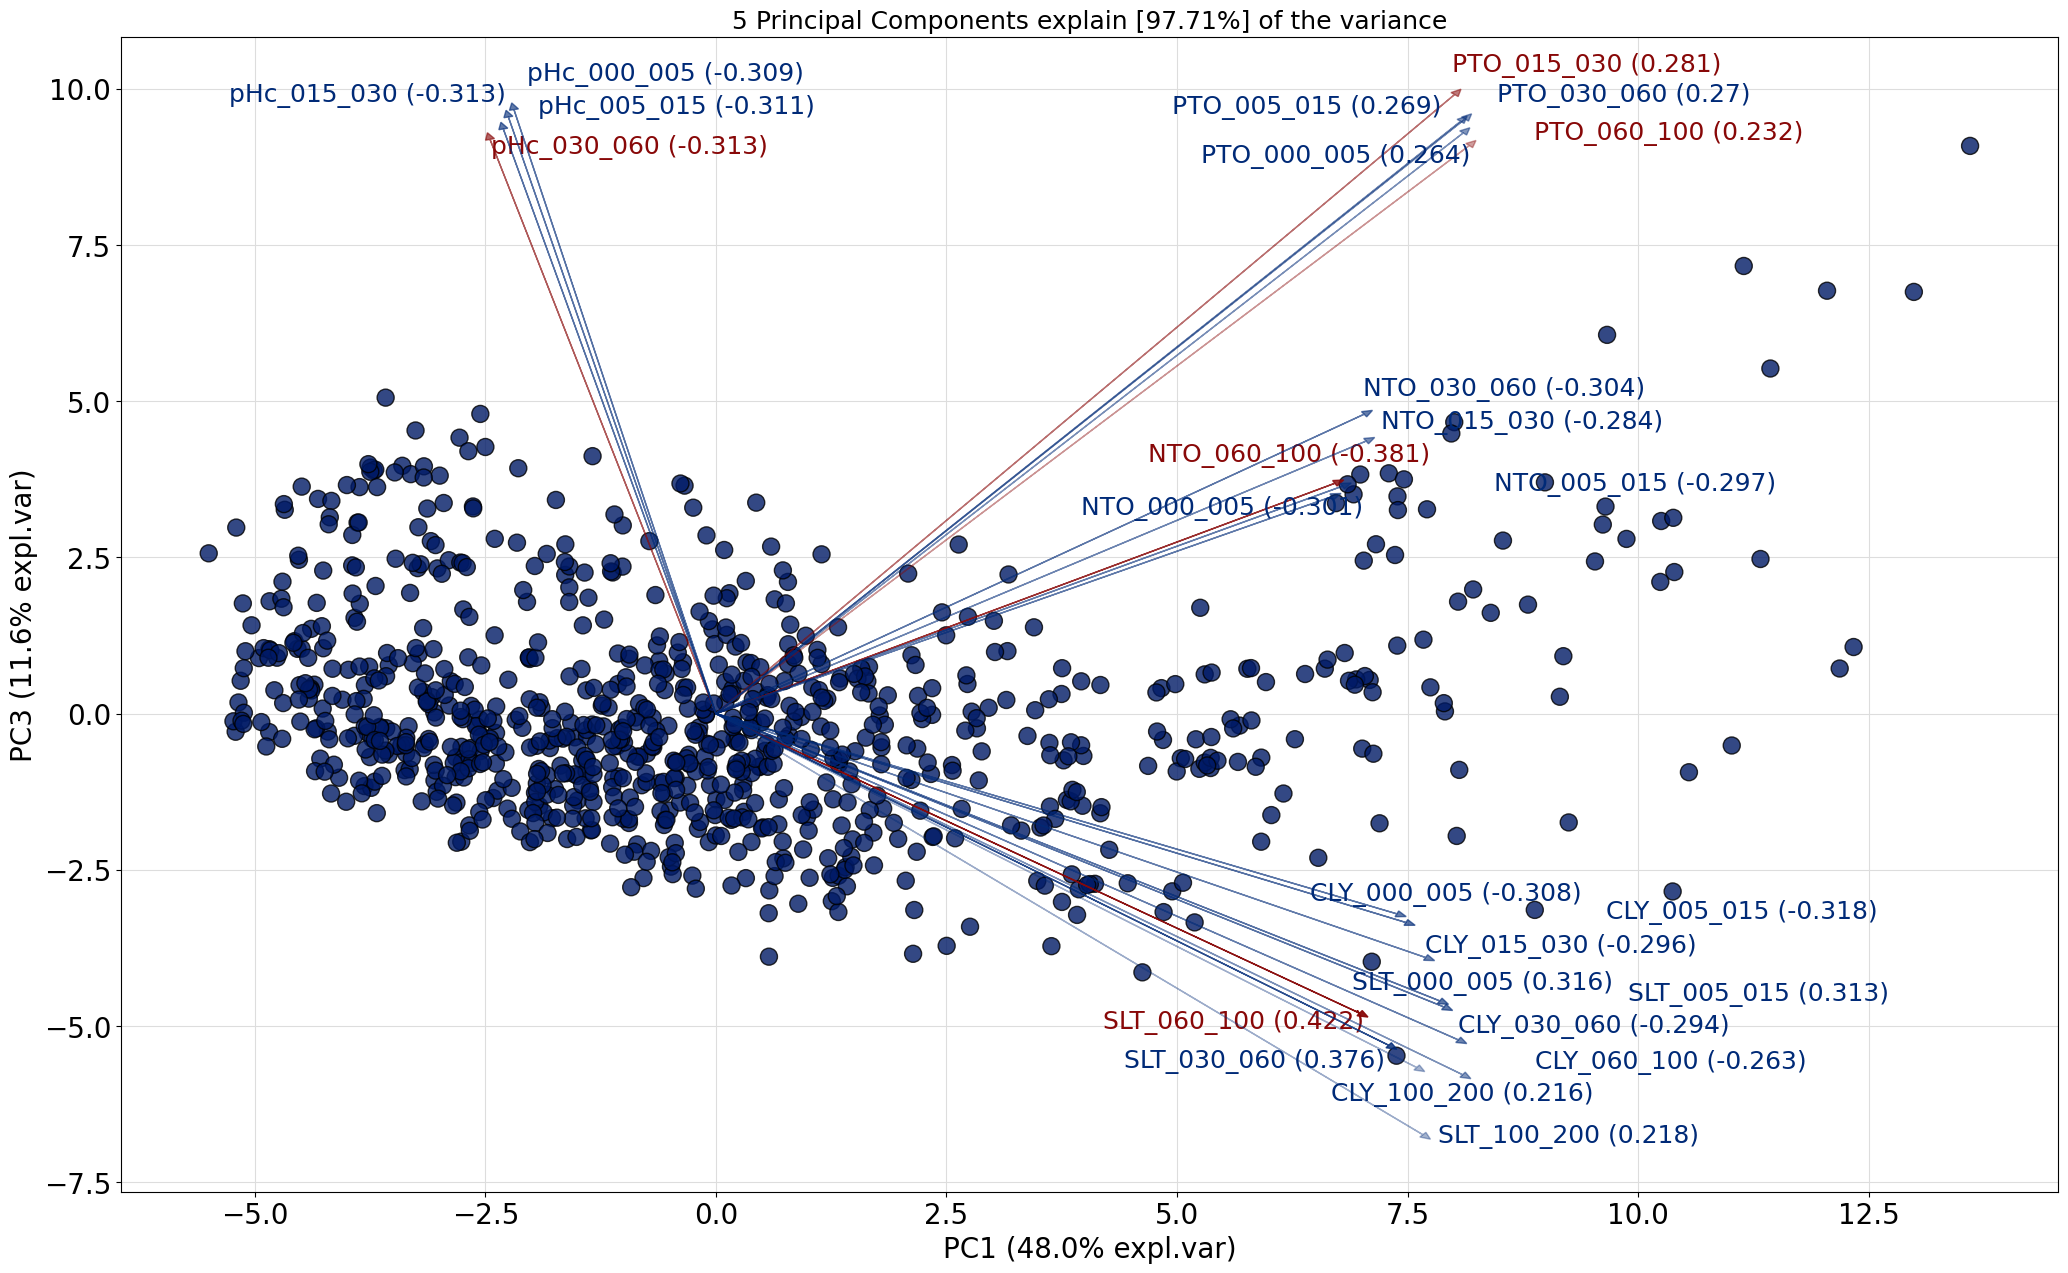

In [36]:
model.biplot(PC = [0,2])

In [37]:
print(model.results['topfeat'])

     PC      feature   loading  type
0   PC1  PTO_060_100  0.232006  best
1   PC2  pHc_030_060 -0.313161  best
2   PC3  PTO_015_030  0.281380  best
3   PC4  NTO_060_100 -0.380565  best
4   PC5  SLT_060_100  0.422343  best
5   PC5  CLY_000_005 -0.308493  weak
6   PC5  CLY_005_015 -0.318293  weak
7   PC5  CLY_015_030 -0.296139  weak
8   PC5  CLY_030_060 -0.293936  weak
9   PC5  CLY_060_100 -0.263394  weak
10  PC1  CLY_100_200  0.216371  weak
11  PC4  NTO_000_005 -0.301273  weak
12  PC4  NTO_005_015 -0.296635  weak
13  PC4  NTO_015_030 -0.283951  weak
14  PC4  NTO_030_060 -0.304226  weak
15  PC3  PTO_000_005  0.264010  weak
16  PC3  PTO_005_015  0.269260  weak
17  PC3  PTO_030_060  0.270282  weak
18  PC5  SLT_000_005  0.315610  weak
19  PC5  SLT_005_015  0.312887  weak
20  PC5  SLT_030_060  0.376033  weak
21  PC1  SLT_100_200  0.218110  weak
22  PC2  pHc_000_005 -0.308892  weak
23  PC2  pHc_005_015 -0.310566  weak
24  PC2  pHc_015_030 -0.313039  weak
25  PC2  pHc_060_100 -0.312896  weak


[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.71%] of the variance'}, xlabel='PC1 (48.0% expl.var)', ylabel='PC2 (27.2% expl.var)'>)

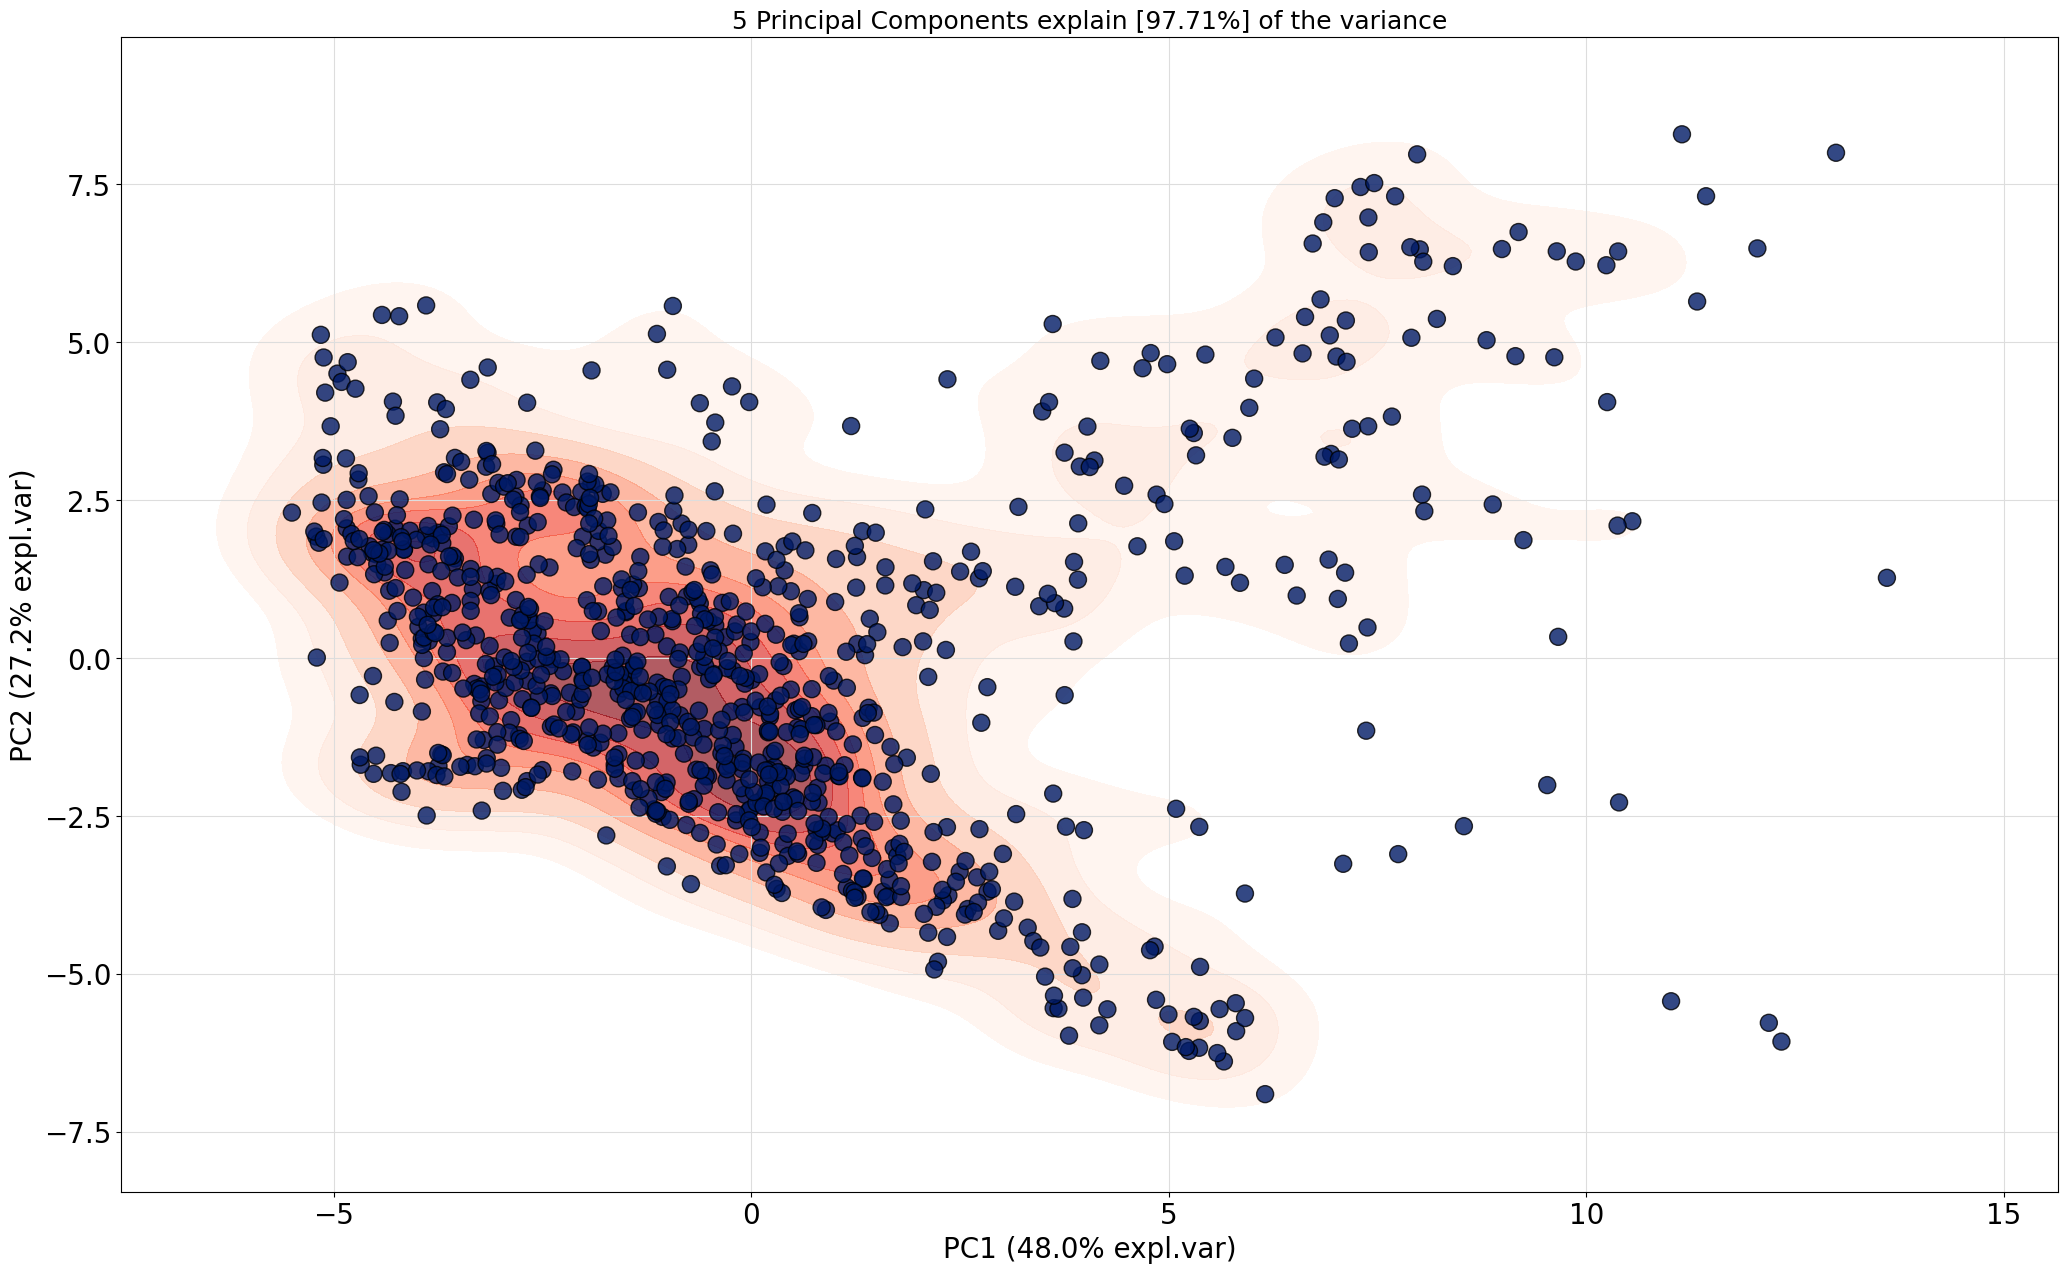

In [38]:
model.scatter(density=True)

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.71%] of the variance'}, xlabel='PC2 (27.2% expl.var)', ylabel='PC3 (11.6% expl.var)'>)

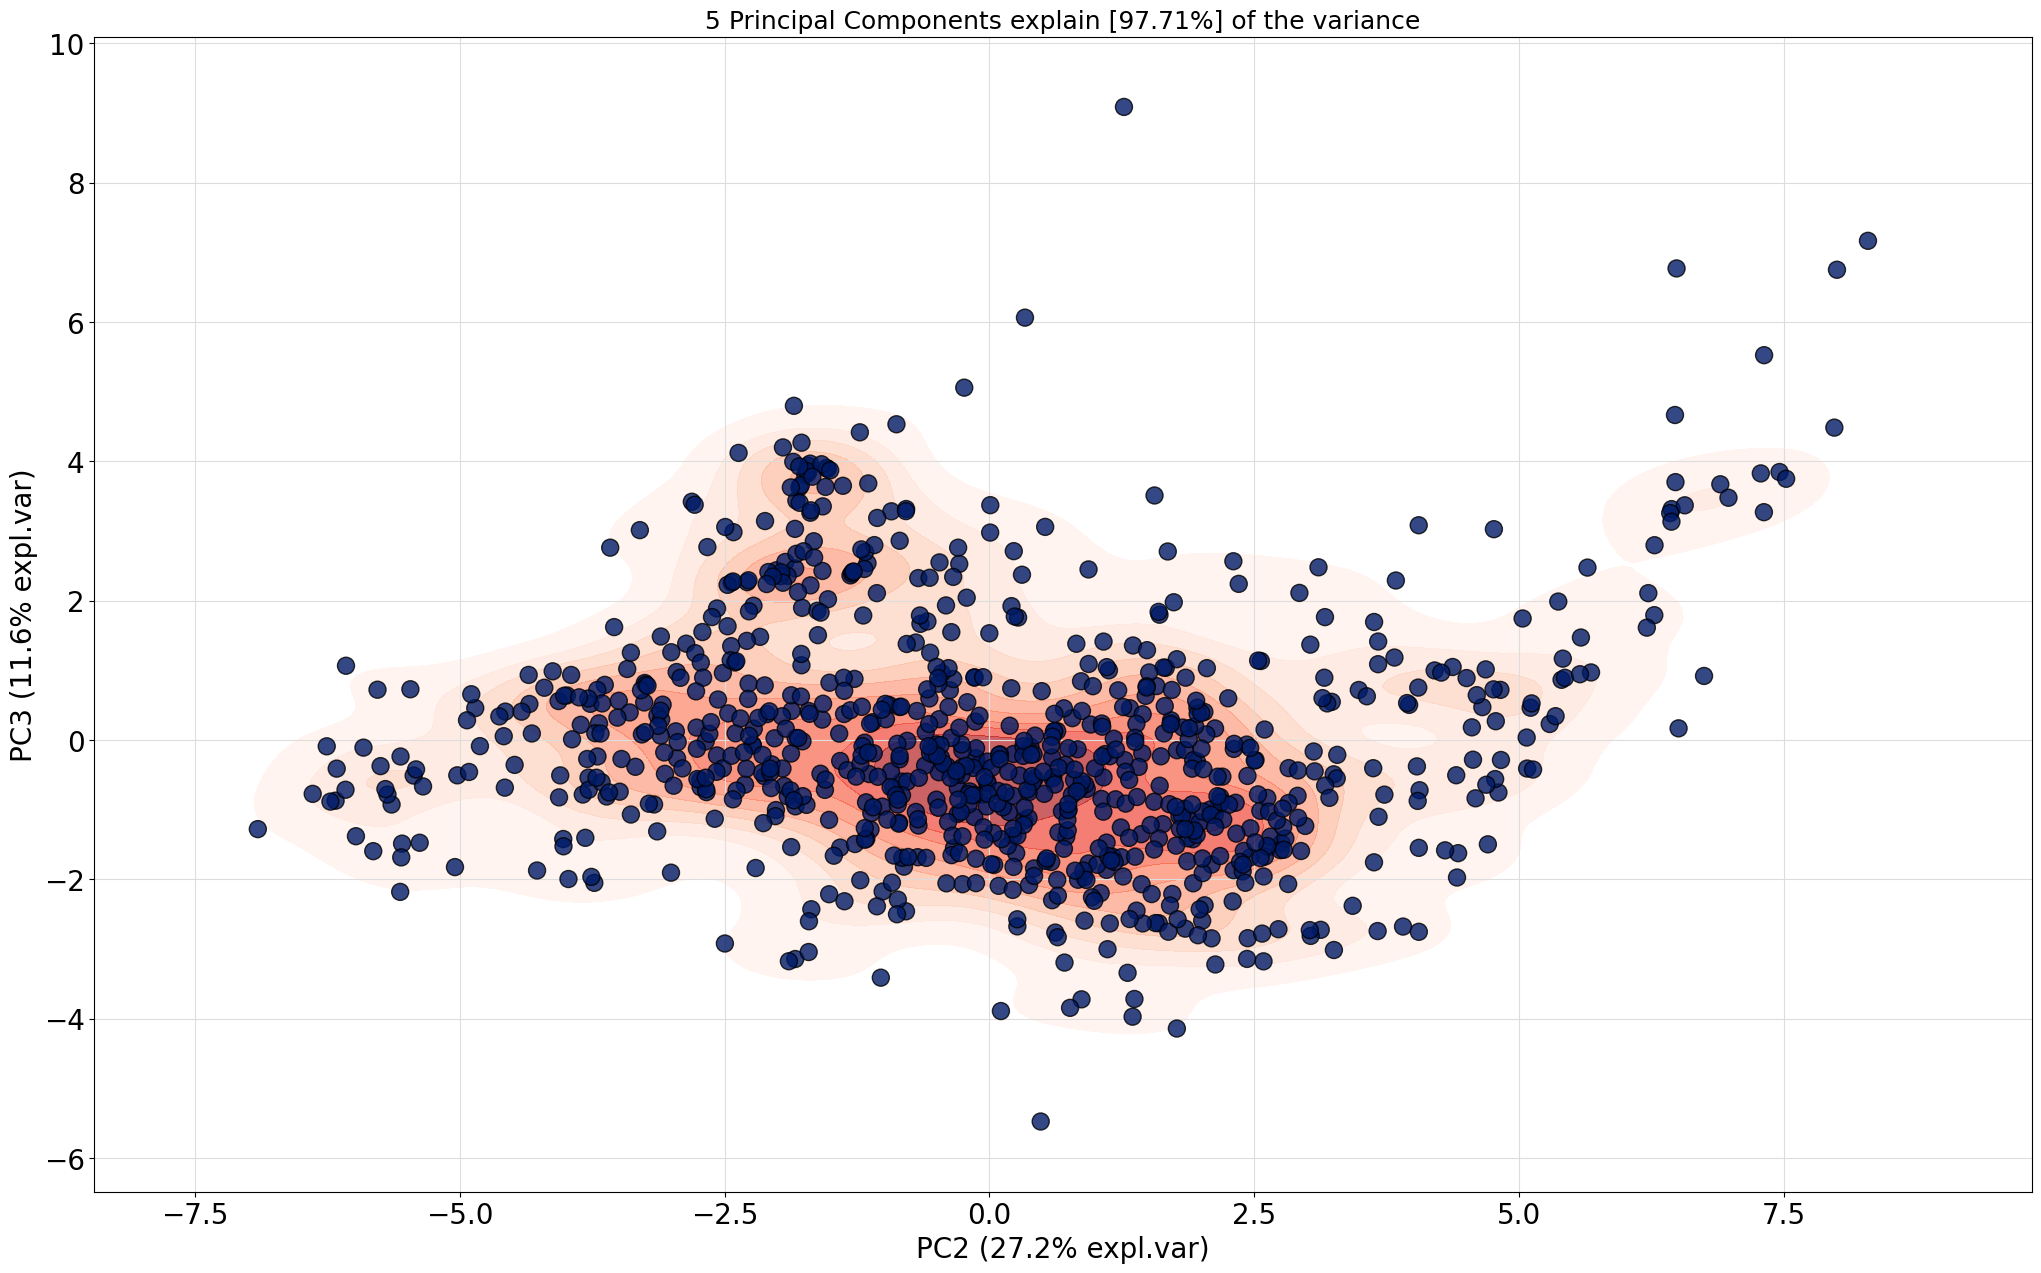

In [39]:
model.scatter(PC=[1, 2], density=True)

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.71%] of the variance'}, xlabel='PC1 (48.0% expl.var)', ylabel='PC3 (11.6% expl.var)'>)

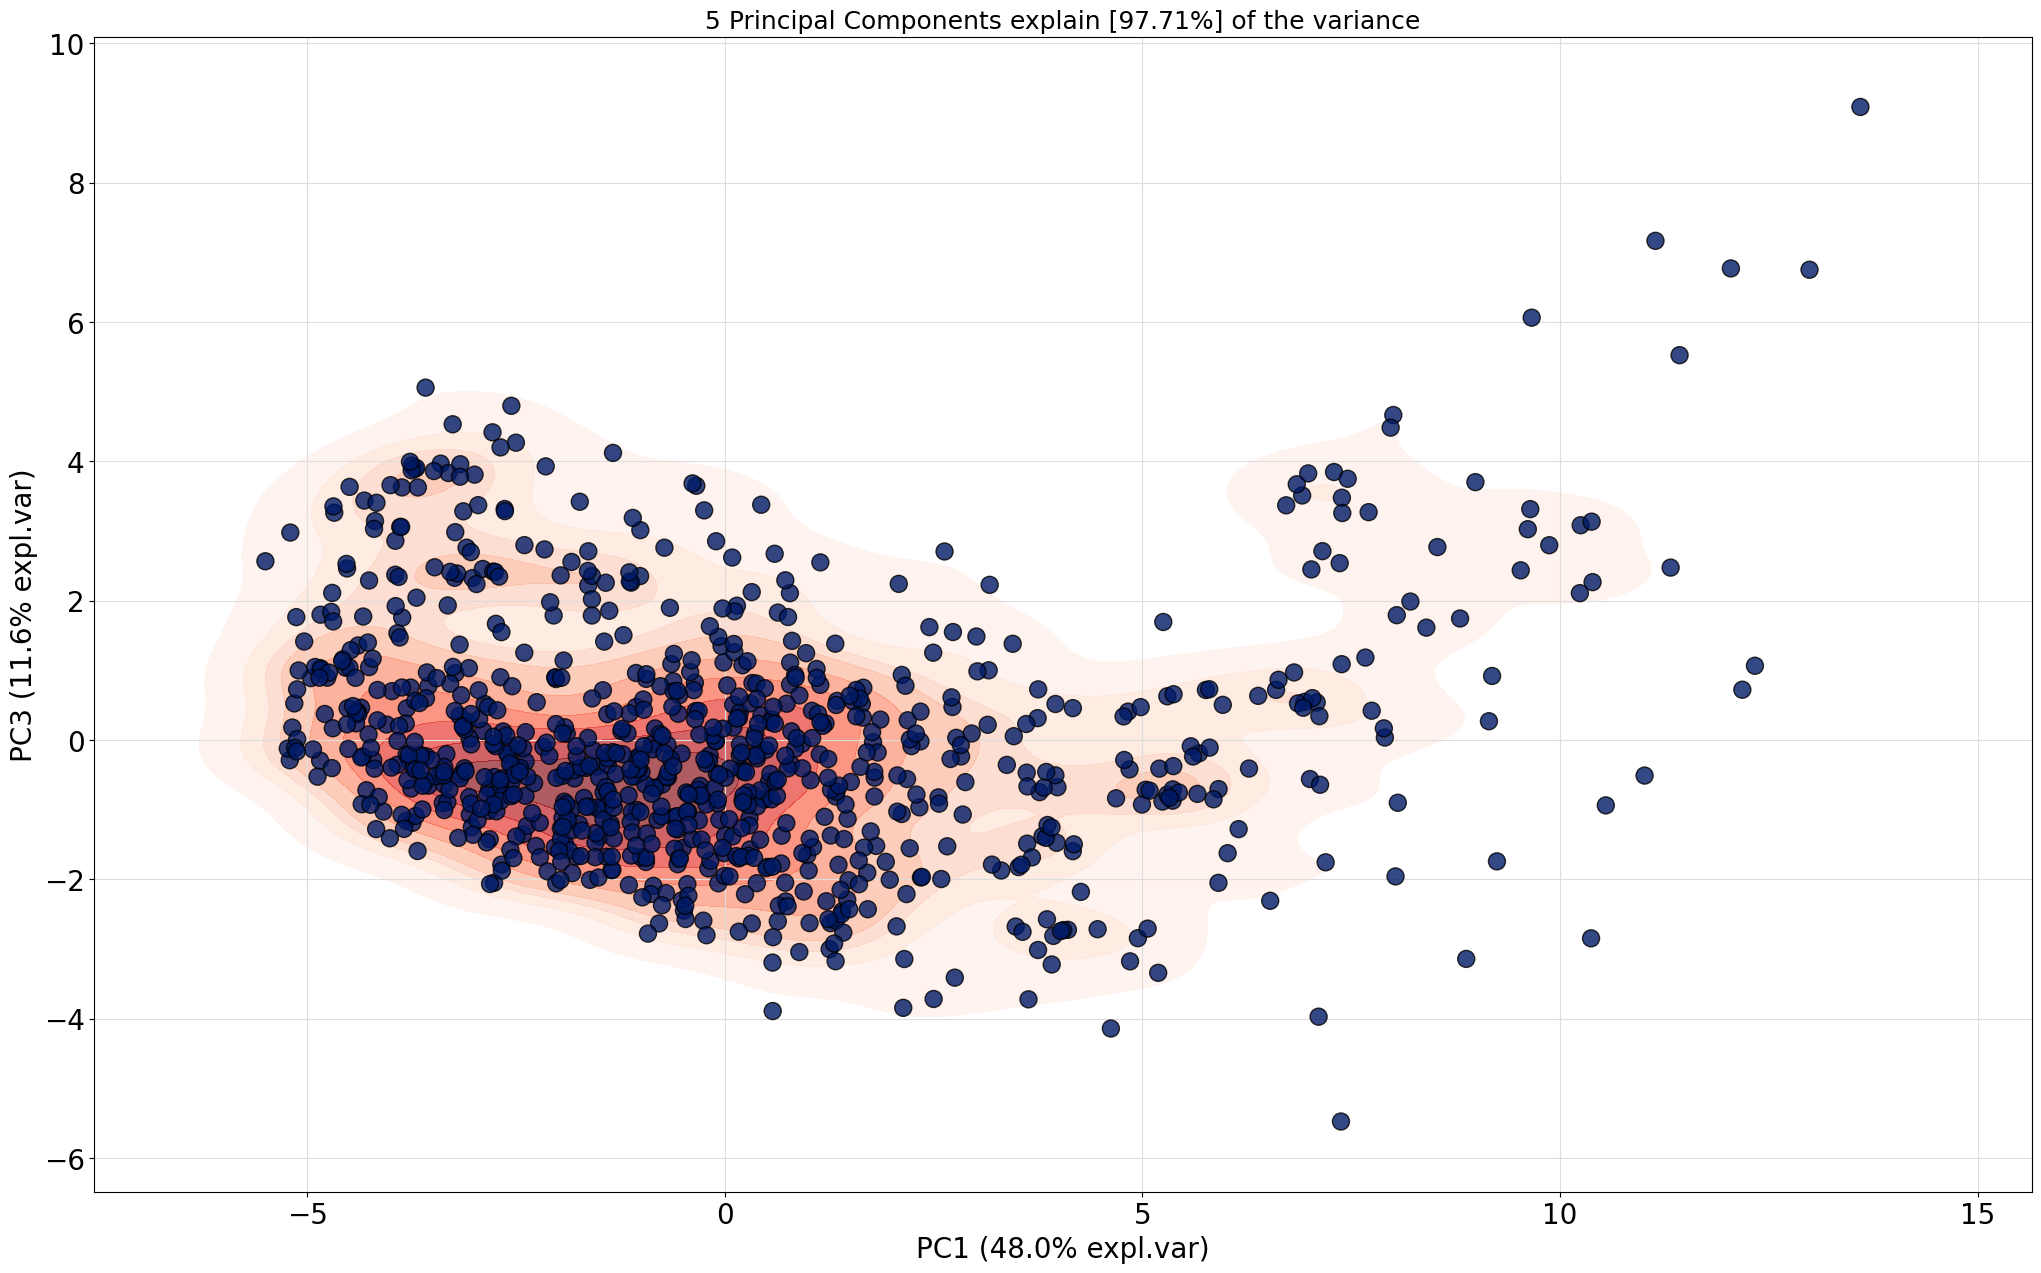

In [40]:
model.scatter(PC=[0, 2], density=True)

PCA citation: https://github.com/erdogant/pca/